## Prueba #0401

### "Número óptimo de clústeres para agrupamiento con K-medias"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Responde la siguiente pregunta proporcionando código Python:

In [2]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.
# ¡Difícil de visualizar!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Defina una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Matriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>
SUGERENCIA: Implemente la fórmula de la clase teórica.

In [3]:
def total_internal_ss(X, centers, clusters):
    sum_dist =0
    for i in np.arange(0,clusters.size):
        # punto, observación para la que se calcula la distancia al centroide
        Xi = X[i,:]
        # clúster al que KMeans ha asignado el punto
        cluster_xi = clusters[i]
        # centroide del clúster al que KMeans ha asignado el punto
        centroide = centers[cluster_xi]
        # suma de las distancias
        sum_dist = sum_dist + np.linalg.norm(Xi-centroide)
    return sum_dist

2). Visualice como un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos. 
- Luego, determine el número óptimo de clústeres.
- ¿Es este número el mismo que se esperaba?

In [8]:
# posibles valores para k
valores_k = np.arange(2,11)  # transparencias empieza en el 2   np.arange(2,11)
# suma interna total de cuadrados para cada valor de k
val_sumas = np.array([])
# obtener el valor de la suma interna total de cuadrados para cada k
for k in valores_k:
    # KMeans con nº agrupaciones = k
    kmeans = KMeans(n_clusters = k)
    
    # calcular la agrupación en clústeres
    kmeans.fit(X)
    # centros de clústeres (centroides)
    centers = kmeans.cluster_centers_
    # resultado del etiquetado de clúster
    clusters = kmeans.labels_
    print("inertia", kmeans.inertia_)
    print("tss", total_internal_ss(X, centers, clusters))
    # calcular la suma interna total de cuadrados
    val_sumas = np.append(val_sumas, total_internal_ss(X, centers, clusters))

inertia 10921.712724042538
tss 1222.7190957070013
inertia 4665.301322394898
tss 814.5908845829434
inertia 4427.616016757532
tss 792.1094551262012
inertia 4183.587685948054
tss 768.4706778130919
inertia 4011.6737561244863
tss 753.3978042973004
inertia 3876.754335436137
tss 739.8822035272477
inertia 3706.844255482886
tss 721.5307956304738
inertia 3582.6452208150777
tss 711.4164200607976
inertia 3484.9964437605568
tss 697.6656777025353


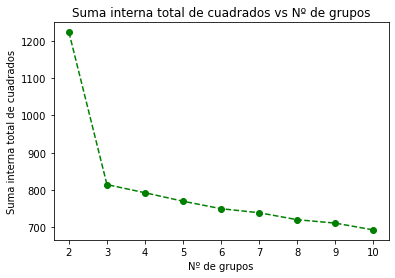

In [5]:
# Visualizar los datos obtenidos
plt.plot(valores_k, val_sumas, "go--")
plt.xlabel("Nº de grupos")
plt.ylabel("Suma interna total de cuadrados")
plt.title("Suma interna total de cuadrados vs Nº de grupos")
plt.show()

A partir del diagrama obtenido se puede determinar que el número óptimo de clústeres es 3. 
Para k = 3 se observa el cambio de tendencia (el codo).

El k obtenido es el esperado ya que al generar las muestras gaussianas se ha indicado que se generarían
3 centros (centers=3).